In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

# [seaborn distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

Flexibly plot a univariate distribution of observations.

This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the
 seaborn [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot) and 
 [rugplot()](https://seaborn.pydata.org/generated/seaborn.rugplot.html#seaborn.rugplot) functions. It 
 can also fit scipy.stats distributions and plot the estimated PDF over the data.


#### References:
[Python vs R: Difference in visualization cpmmmands/parameters](https://www.kdnuggets.com/2019/03/r-vs-python-data-visualization.html)


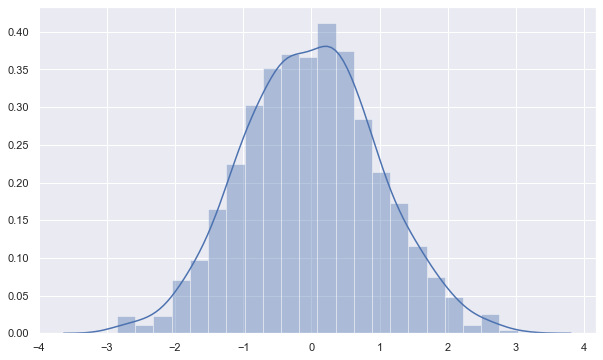

In [2]:
x = np.random.randn(1000)
plt.figure(figsize=(10,6));
sns.distplot(x);

Use Pandas objects to get an informative axis label:

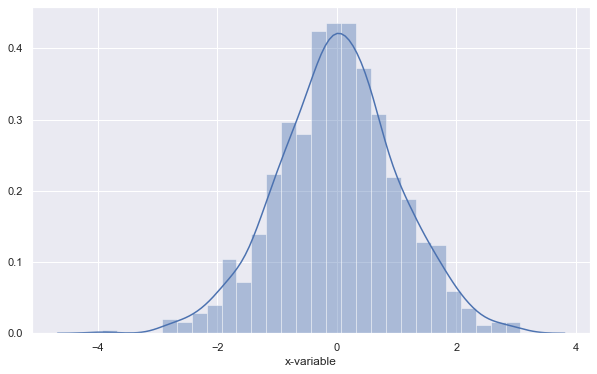

In [3]:
x = pd.Series(np.random.randn(1000), name = 'x-variable')
plt.figure(figsize=(10,6));
sns.distplot(x);

### Plot the distribution with a kernel density estimate only

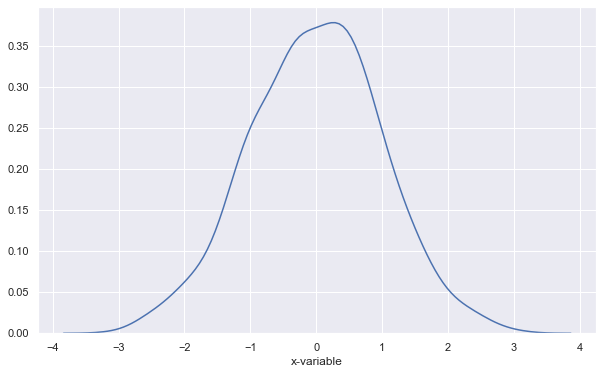

In [4]:
x = pd.Series(np.random.randn(1000), name = 'x-variable')
plt.figure(figsize=(10,6));
sns.distplot(x, hist = False);

### Plot the distribution with a kernel density estimate and rugplot

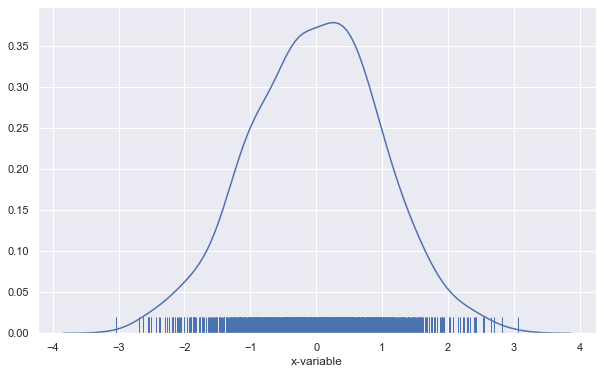

In [5]:
plt.figure(figsize=(10,6));
sns.distplot(x, rug=True, hist=False);

### Plot the distribution with a histogram and maximum likelihood gaussian distribution fit:

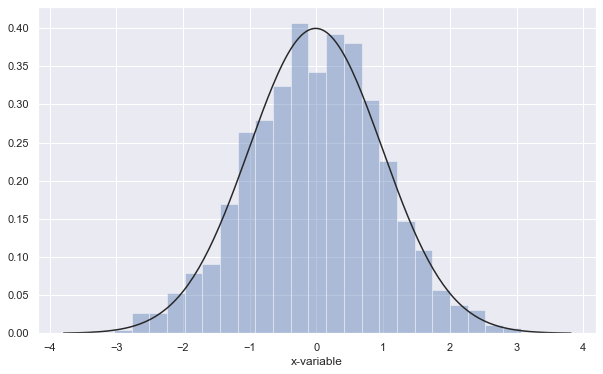

In [6]:
plt.figure(figsize=(10,6));
from scipy.stats import norm
sns.distplot(x, fit=norm, rug=False, kde = False);

### Plot the distribution on the vertical axis:

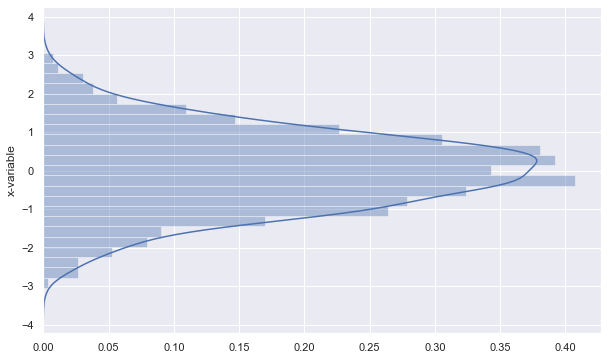

In [7]:
plt.figure(figsize=(10,6));
sns.distplot(x, vertical=True);

### Change the color of all the plot elements:

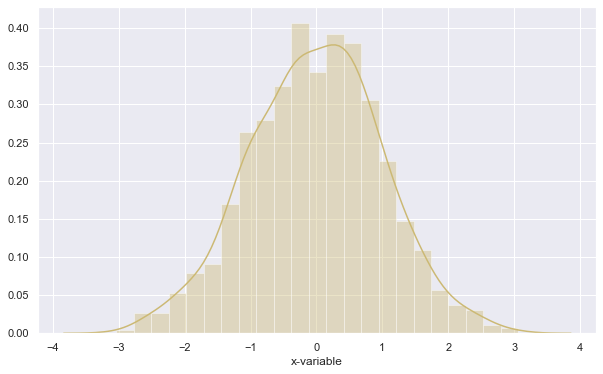

In [8]:
sns.set_color_codes()
plt.figure(figsize=(10,6));
sns.distplot(x, color="y");

### Pass specific parameters to the underlying plot functions:

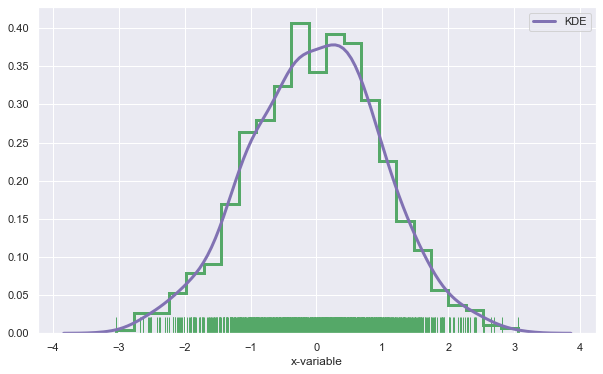

In [11]:
plt.figure(figsize=(10,6));
sns.distplot(x, rug = True, rug_kws = {"color":"g"}, kde_kws = {"color":"k", "lw":3, "label":"KDE", "color":"m"},
             hist_kws = {"histtype":"step", "linewidth":3, "alpha": 1, "color": "g"});